In [4]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
#importing data with read_json
df = pd.read_json("modcloth_final_data1.json", lines = True)

In [6]:
df.head()

item_id  waist  size  quality cup size  hips  bra size category bust  \
0   123373   29.0     7      5.0        d  38.0      34.0      new   36   
1   123373   31.0    13      3.0        b  30.0      36.0      new  NaN   
2   123373   30.0     7      2.0        b   NaN      32.0      new  NaN   
3   123373    NaN    21      5.0     dd/e   NaN       NaN      new  NaN   
4   123373    NaN    18      5.0        b   NaN      36.0      new  NaN   

    height         user_name         length    fit  user_id  shoe size  \
0  5ft 6in             Emily     just right  small   991571        NaN   
1  5ft 2in  sydneybraden2001     just right  small   587883        NaN   
2  5ft 7in             Ugggh  slightly long  small   395665        9.0   
3      NaN      alexmeyer626     just right    fit   875643        NaN   
4  5ft 2in        dberrones1  slightly long  small   944840        NaN   

  shoe width review_summary review_text  
0        NaN            NaN         NaN  
1        NaN            NaN         NaN  
2        NaN            NaN         NaN  
3        NaN            NaN         NaN  
4        NaN            NaN         NaN

In [7]:
df.columns = [x.replace(" ","_") for x in df.columns]

In [8]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text'],
      dtype='object')

In [9]:
df.isna().sum()

item_id               0
waist             79908
size                  0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

In [10]:
#percentage of missing values in the dataframe
pd.DataFrame({'missing data percentage': (df.isna().sum()/len(df)) * 100, 'total': df.isna().sum()})

missing data percentage  total
item_id                        0.000000      0
waist                         96.518903  79908
size                           0.000000      0
quality                        0.082136     68
cup_size                       7.555260   6255
hips                          32.281677  26726
bra_size                       7.268994   6018
category                       0.000000      0
bust                          85.681846  70936
height                         1.337118   1107
user_name                      0.000000      0
length                         0.042276     35
fit                            0.000000      0
user_id                        0.000000      0
shoe_size                     66.282160  54875
shoe_width                    77.525063  64183
review_summary                 8.122962   6725
review_text                    8.122962   6725

In [11]:
#to check for the outliers we can sethe quartiles values if there is much diff then we can tell that there are outliers
#as we can see in shoe_suze col the min value is and max vale is 38
df.describe()

item_id        waist          size       quality          hips  \
count   82790.000000  2882.000000  82790.000000  82722.000000  56064.000000   
mean   469325.229170    31.319223     12.661602      3.949058     40.358501   
std    213999.803314     5.302849      8.271952      0.992783      5.827166   
min    123373.000000    20.000000      0.000000      1.000000     30.000000   
25%    314980.000000    28.000000      8.000000      3.000000     36.000000   
50%    454030.000000    30.000000     12.000000      4.000000     39.000000   
75%    658440.000000    34.000000     15.000000      5.000000     43.000000   
max    807722.000000    50.000000     38.000000      5.000000     60.000000   

           bra_size        user_id     shoe_size  
count  76772.000000   82790.000000  27915.000000  
mean      35.972125  498849.564718      8.145818  
std        3.224907  286356.969459      1.336109  
min       28.000000       6.000000      5.000000  
25%       34.000000  252897.750000      7.000000  
50%       36.000000  497913.500000      8.000000  
75%       38.000000  744745.250000      9.000000  
max       48.000000  999972.000000     38.000000

In [12]:
len(df.user_id.unique())

47958

In [13]:
#shoe_size has a single oulier which is replaced with none
df[df['shoe_size'] == 38]

item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498       38.0    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [14]:
df.at[37313, 'shoe_size'] = None
df[df['user_id'] == 237498]

item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498        NaN    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [15]:
len(df.item_id.unique())

1378

In [16]:
#we ploted a heatmap to check the correlation
# we can see that bra_size and size are highly correlated
corr_mat = df.corr()
sns.heatmap(corr_mat, annot = True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

# Data cleaning and pre-processing

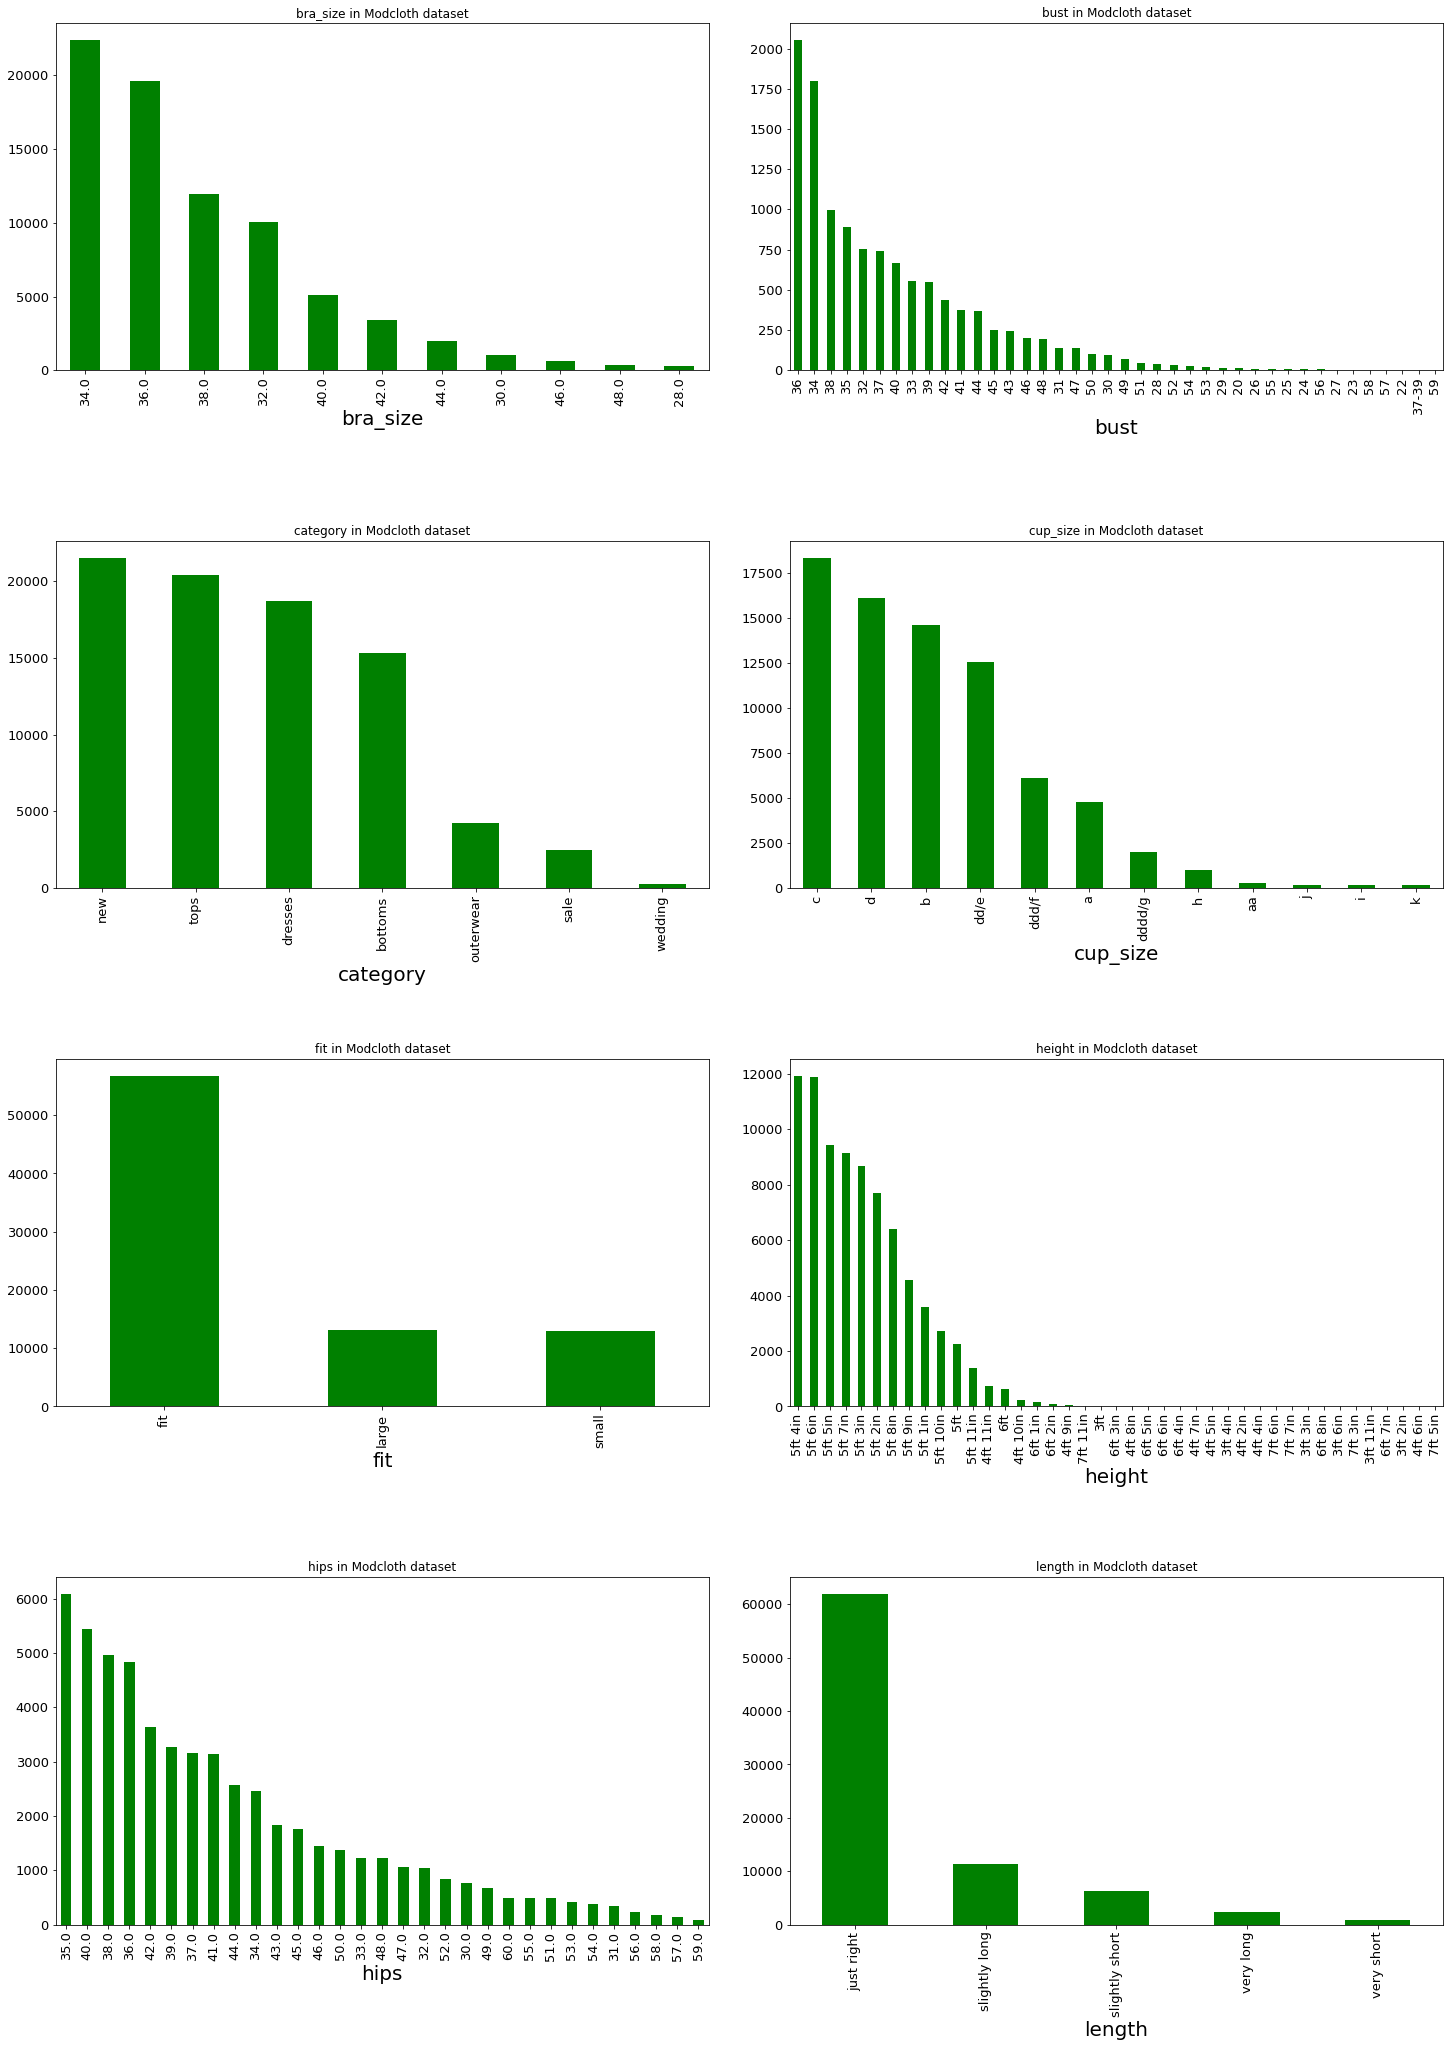

In [17]:
#we plotted some bar graphs for columns
#it shows what are the values in the rows for specific columns
def plot_bargraphs(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind = 'bar', facecolor = 'g', ax = ax, fontsize = 13)
    ax.set_xlabel("{}".format(col), fontsize = 20)
    ax.set_title("{} in Modcloth dataset".format(col))
    return ax

fig, axes = plt.subplots(4, 2, figsize = (20, 30))
fig.tight_layout(h_pad = 15, w_pad = 5, rect = [0, 0.03, 1, 0.93])
cols = ['bra_size', 'bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'qualilty']
k = 0

for i in range(4):
    for j in range(2):
        plot_bargraphs(cols[k], axes[i][j])
        k += 1
        
plt.show()

In [18]:
#here in bust_size we have a range that is 37-39
#we replaced that we that average of values of 37 and 39
df.bust.unique()

array(['36', nan, '39', '34', '43', '35', '38', '33', '40', '41', '44',
       '45', '37', '30', '32', '42', '48', '46', '51', '25', '31', '26',
       '52', '22', '50', '47', '56', '58', '49', '54', '55', '53', '27',
       '28', '29', '20', '57', '23', '37-39', '24', '59'], dtype=object)

In [19]:
df[df['bust'] == '37-39']

item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498        NaN    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [20]:
df.at[37313, 'bust'] = statistics.mean([37, 39])
df[df['user_id'] == 237498]

item_id  waist  size  quality cup_size  hips  bra_size category bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new   38   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498        NaN    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [21]:
df['height'].unique()

array(['5ft 6in', '5ft 2in', '5ft 7in', nan, '5ft 4in', '5ft 3in',
       '5ft 5in', '5ft 10in', '5ft 8in', '5ft', '5ft 9in', '5ft 1in',
       '5ft 11in', '4ft 11in', '4ft 10in', '6ft', '3ft 4in', '4ft 9in',
       '6ft 3in', '6ft 1in', '6ft 2in', '3ft', '4ft 7in', '4ft 4in',
       '7ft 11in', '4ft 2in', '6ft 6in', '4ft 8in', '6ft 4in', '3ft 11in',
       '6ft 5in', '7ft 6in', '3ft 6in', '3ft 3in', '6ft 8in', '7ft 5in',
       '7ft 3in', '7ft 7in', '6ft 7in', '4ft 5in', '3ft 2in', '4ft 6in'],
      dtype=object)

In [22]:
#the height is in feets and inches we converted that to cms using the below function
def convert_to_cms(x):
    if(type(x) != float):
        x = x.split(' ')
        if(len(x) == 2):
            return round((int(x[0][0]) * 30.48 + int(x[1][0]) * 2.54), 2)
        else:
            return round(int(x[0][0]) * 30.48, 2)

In [23]:
df.height = df.height.apply(convert_to_cms)

In [24]:
df.height

0        167.64
1        157.48
2        170.18
3           NaN
4        157.48
          ...  
82785    172.72
82786    165.10
82787    162.56
82788    160.02
82789    182.88
Name: height, Length: 82790, dtype: float64

# Handling Outliers

In [28]:
#type conversion
df['bust'] = df['bust'].apply(lambda x: int(x) if pd.notnull(x) else None)

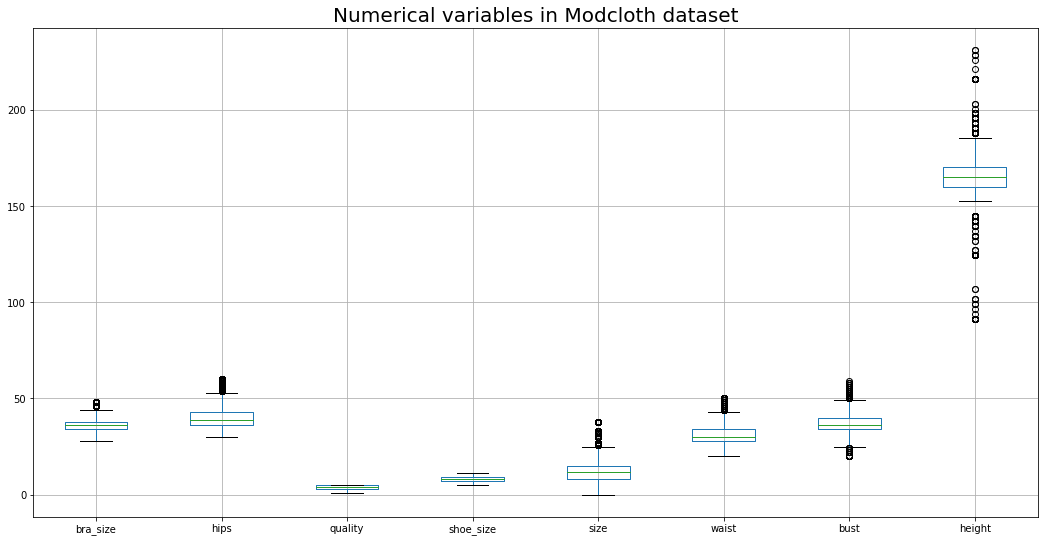

In [29]:
#to check for the ouliers we plotted box plot
num_cols = ['bra_size','hips','quality','shoe_size','size','waist', 'bust', 'height', ]
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

In [26]:
len(df)

82790

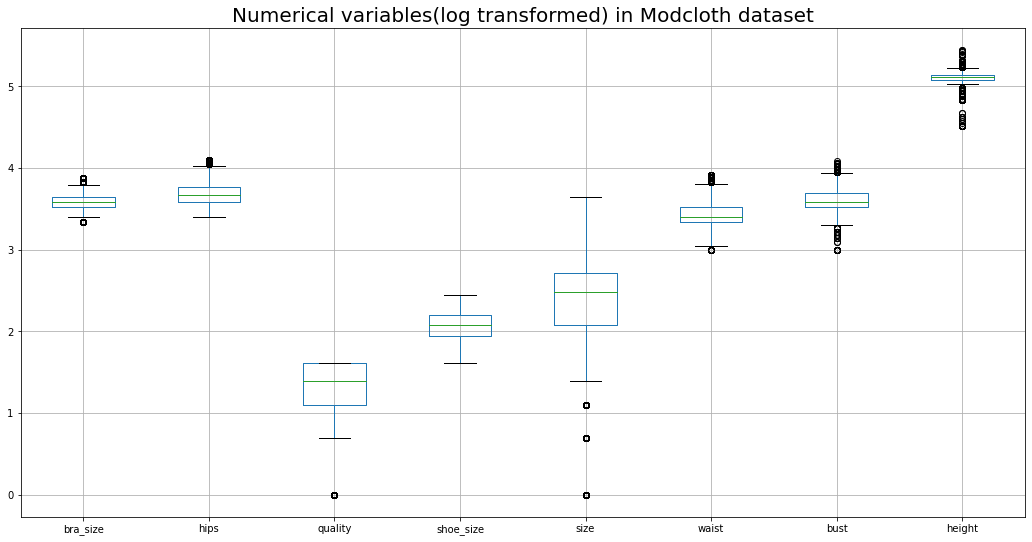

In [30]:
num_cols = ['bra_size','hips','quality','shoe_size','size','waist', 'bust', 'height', ]
plt.figure(figsize=(18,9))
np.log(df[num_cols]).boxplot()
plt.title("Numerical variables(log transformed) in Modcloth dataset", fontsize=20)
plt.show()

In [31]:
#we dropped the rows in which the values are not in interquartike range for the cols item_id and user_id
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
Q1.drop(["item_id","user_id"], inplace =True)
Q3.drop(["item_id","user_id"], inplace = True)
IQR = Q3 - Q1

In [32]:
len(df)

82790

In [33]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-33-9479ebe7591b>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-33-9479ebe7591b>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [34]:
df.reset_index(drop=True, inplace=True)

# Feature Engineering

In [35]:
#filling the missing values in cup_size and bra_size with unkonown
df.cup_size.fillna("unknown", inplace = True)
df.bra_size.fillna("unknown", inplace = True)

In [36]:
df['category'].unique()

array(['new', 'dresses', 'wedding', 'sale', 'tops', 'bottoms',
       'outerwear'], dtype=object)

In [37]:
#First time buyer logic:
#if bra_size/cup_size and other columns null => first time lingerie
#if shoe_size/shoe_width and other columns null => first time shoes
#if hips/waist and other columns null => first time dress/tops

In [38]:
lingerie = (((df.bra_size != "unknown") | (df.cup_size != "unknown")) & df.height.isnull() & df.hips.isnull() & df.shoe_size.isnull() & df.shoe_width.isnull() & df.waist.isnull())

shoes = (((df.bra_size == "unknown") & (df.cup_size == "unknown")) & df.height.isnull() & df.hips.isnull() & (df.shoe_size.notnull() | df.shoe_width.notnull()) & df.waist.isnull())

dress = (((df.bra_size == "unknown") & (df.cup_size == "unknown")) & df.height.isnull() & (df.hips.notnull() | df.waist.notnull()) & df.shoe_size.isnull() & df.shoe_width.isnull())
 
df["first_time_user"] = (lingerie | shoes | dress)


In [39]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text',
       'first_time_user'],
      dtype='object')

In [40]:
df.head()

item_id  waist  size  quality cup_size  hips bra_size category  bust  \
0   123373   29.0     7      5.0        d  38.0     34.0      new  36.0   
1   123373   31.0    13      3.0        b  30.0     36.0      new   NaN   
2   123373   30.0     7      2.0        b   NaN     32.0      new   NaN   
3   123373    NaN    21      5.0     dd/e   NaN  unknown      new   NaN   
4   123373    NaN    18      5.0        b   NaN     36.0      new   NaN   

   height         user_name         length    fit  user_id  shoe_size  \
0  167.64             Emily     just right  small   991571        NaN   
1  157.48  sydneybraden2001     just right  small   587883        NaN   
2  170.18             Ugggh  slightly long  small   395665        9.0   
3     NaN      alexmeyer626     just right    fit   875643        NaN   
4  157.48        dberrones1  slightly long  small   944840        NaN   

  shoe_width review_summary review_text  first_time_user  
0        NaN            NaN         NaN            False  
1        NaN            NaN         NaN            False  
2        NaN            NaN         NaN            False  
3        NaN            NaN         NaN             True  
4        NaN            NaN         NaN            False

In [41]:
len(df[df['first_time_user'] == True])

694

# Conversion

In [42]:
(sorted(df.hips.unique()))

[30.0,
 33.0,
 34.0,
 35.0,
 36.0,
 38.0,
 nan,
 31.0,
 32.0,
 37.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0]

In [43]:
#in hips col the missing values are replaced with -1
df.hips = df.hips.fillna(-1.0)

In [44]:
labels = ['Unknown', 'XS', 'S', 'M', 'L', 'XL', 'Plus size']

In [45]:
bins = [-5, 0, 33, 37, 41, 45, 50, 61]

In [46]:
df.hips = pd.cut(df.hips, bins, labels = labels)

In [47]:
len(df[df['hips'] == 'Plus size'])

458

In [48]:
df['hips'].unique()

['M', 'XS', 'Unknown', 'L', 'XL', 'S', 'Plus size']
Categories (7, object): ['Unknown' < 'XS' < 'S' < 'M' < 'L' < 'XL' < 'Plus size']

# Cleaning

In [49]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text',
       'first_time_user'],
      dtype='object')

In [50]:
#16
#dropped some cols
df.drop(['bust', 'user_name', 'waist', 'review_summary'],axis = 1, inplace = True)

In [51]:
len(df.columns)

15

In [52]:
df.height.plot.kde()

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

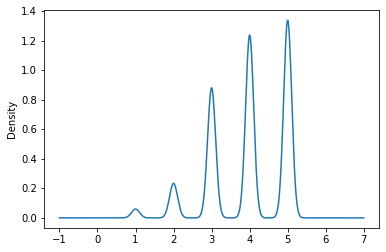

In [53]:
df.quality.plot.kde()

In [54]:
#transforming missing values
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [55]:
df[['height', 'quality']] = median_imputer.fit_transform(df[['height', 'quality']])

In [56]:
df['length'].value_counts()

just right        52745
slightly long      9505
slightly short     5438
very long          1981
very short          664
Name: length, dtype: int64

In [57]:
df["length"] = df.length.fillna(df['length'].value_counts().index[0])

In [58]:
df.isna().sum()

item_id                0
size                   0
quality                0
cup_size               0
hips                   0
bra_size               0
category               0
height                 0
length                 0
fit                    0
user_id                0
shoe_size          45976
shoe_width         54400
review_text         5621
first_time_user        0
dtype: int64

# Training and Testing

In [59]:
le = LabelEncoder()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70361 entries, 0 to 70360
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          70361 non-null  int64   
 1   size             70361 non-null  int64   
 2   quality          70361 non-null  float64 
 3   cup_size         70361 non-null  object  
 4   hips             70361 non-null  category
 5   bra_size         70361 non-null  object  
 6   category         70361 non-null  object  
 7   height           70361 non-null  float64 
 8   length           70361 non-null  object  
 9   fit              70361 non-null  object  
 10  user_id          70361 non-null  int64   
 11  shoe_size        24385 non-null  float64 
 12  shoe_width       15961 non-null  object  
 13  review_text      64740 non-null  object  
 14  first_time_user  70361 non-null  bool    
dtypes: bool(1), category(1), float64(3), int64(3), object(7)
memory usage: 7.1+ MB


In [61]:
df['bra_size'] = df['bra_size'].replace(['unknown'], 0)

In [62]:
#converting categorical to nummerical
df['num_cup_size'] = le.fit_transform(df['cup_size'])
df['num_hips'] = le.fit_transform(df['hips'])
df['num_category'] = le.fit_transform(df['category'])
df['num_length'] = le.fit_transform(df['length'])
df['num_first_time_user'] = le.fit_transform(df['first_time_user'])

In [63]:
df.head()

item_id  size  quality cup_size     hips  bra_size category  height  \
0   123373     7      5.0        d        M      34.0      new  167.64   
1   123373    13      3.0        b       XS      36.0      new  157.48   
2   123373     7      2.0        b  Unknown      32.0      new  170.18   
3   123373    21      5.0     dd/e  Unknown       0.0      new  165.10   
4   123373    18      5.0        b  Unknown      36.0      new  157.48   

          length    fit  user_id  shoe_size shoe_width review_text  \
0     just right  small   991571        NaN        NaN         NaN   
1     just right  small   587883        NaN        NaN         NaN   
2  slightly long  small   395665        9.0        NaN         NaN   
3     just right    fit   875643        NaN        NaN         NaN   
4  slightly long  small   944840        NaN        NaN         NaN   

   first_time_user  num_cup_size  num_hips  num_category  num_length  \
0            False             4         1             2           0   
1            False             2         6             2           0   
2            False             2         4             2           1   
3             True             5         4             2           0   
4            False             2         4             2           1   

   num_first_time_user  
0                    0  
1                    0  
2                    0  
3                    1  
4                    0

In [64]:
sorted(df['cup_size'].unique())

['a',
 'aa',
 'b',
 'c',
 'd',
 'dd/e',
 'ddd/f',
 'dddd/g',
 'h',
 'i',
 'j',
 'k',
 'unknown']

In [65]:
sorted(df['hips'].unique())

['L', 'M', 'Plus size', 'S', 'Unknown', 'XL', 'XS']

In [66]:
sorted(df['category'].unique())

['bottoms', 'dresses', 'new', 'outerwear', 'sale', 'tops', 'wedding']

In [67]:
sorted(df['length'].unique())

['just right', 'slightly long', 'slightly short', 'very long', 'very short']

# Fit Prediction

In [68]:
#features and target varibale
X = df[['num_cup_size', 'bra_size', 'num_length', 'num_hips', 'height', 'num_first_time_user','size']].values
Y = df['fit'].values
X[0]

array([  4.  ,  34.  ,   0.  ,   1.  , 167.64,   0.  ,   7.  ])

In [69]:
#70: 30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)#, test_size = 0.3

In [70]:
#Random forest classifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(Y_test, Y_pred)

In [71]:
#KNN classifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, y_pred)

In [72]:
#Decision tree classifier
fit_model = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 15, criterion = "entropy")
fit_model.fit(X_train, Y_train)
y_pred = fit_model.predict(X_test)
dtree_acc = accuracy_score(Y_test, y_pred)

In [80]:
models = ["Random Forest", "K Nearest Neighbors", "Decision Tree Classifier"]
scores = [rfc_acc, knn_acc, dtree_acc]
for i in range(3):
    print(str(i+1) + ". " + models[i] + "\n   " + "Accuracy score: " + str(round(scores[i]*100, 2)) + "%\n")

1. Random Forest
   Accuracy score: 66.94%

2. K Nearest Neighbors
   Accuracy score: 69.46%

3. Decision Tree Classifier
   Accuracy score: 69.46%



In [81]:
fit_model.predict([[4, 1.0, 0, 1, 167.64, 0,6]])

array(['fit'], dtype=object)

In [83]:
import pickle
with open("fitmodel_pickle.pkl", "wb") as f:
    pickle.dump(fit_model, f)

# Size Prediction

In [84]:
#features and target varibale
X = df[['num_cup_size', 'bra_size', 'num_length', 'num_hips', 'height', 'num_first_time_user']].values
Y = df['size'].values

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [86]:
#Random forest classifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(Y_test, Y_pred)

In [87]:
#KNN classifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, y_pred)

In [88]:
#xgboost classifier - Random forest extension
xgbcl = XGBRFClassifier()
xgbcl.fit(X_train, Y_train)
y_xgbcl = xgbcl.predict(X_test)
xgbcl_acc = accuracy_score(Y_test, y_pred)

C:\Users\Harinigannamani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[22:23:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [90]:
#Decision tree classifier
size_model = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 15, criterion = "entropy")
size_model.fit(X_train, Y_train)
y_pred = size_model.predict(X_test)
dtree_acc = accuracy_score(Y_test, y_pred)

In [91]:
models = ["Random Forest", "K Nearest Neighbors",  "XGBoost", "Decision Tree Classifier"]
scores = [rfc_acc, knn_acc, xgbcl_acc, dtree_acc]
for i in range(4):
    print(str(i+1) + ". " + models[i] + "\n   " + "Accuracy score: " + str(round(scores[i], 2)) + "%\n")

1. Random Forest
   Accuracy score: 0.44%

2. K Nearest Neighbors
   Accuracy score: 0.43%

3. XGBoost
   Accuracy score: 0.43%

4. Decision Tree Classifier
   Accuracy score: 0.45%



In [92]:
with open("sizemodel_pickle.pkl", "wb") as f:
    pickle.dump(size_model, f)